[Reference](https://riteshshergill.medium.com/creating-amazing-visualizations-with-matplotlib-and-seaborn-486fa7d68c1e)

# 3D scatter plot

In [8]:
# 3D scatter plot with random color mapping
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Generate a random color array
colors = np.random.rand(len(data))

# Scatter plot
scatter = ax.scatter(data['alcohol'], data['pH'], data['sulphates'],
                     c=colors, cmap='hsv', s=100, alpha=0.7)

# Add color bar
fig.colorbar(scatter)

ax.set_title('3D Scatter Plot with Random Colors')
ax.set_xlabel('Alcohol')
ax.set_ylabel('pH')
ax.set_zlabel('Sulphates')
plt.show()

# 3D Spiral Histogram

In [9]:
# Generate the parameters for the spiral
theta = np.linspace(0, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)  # Adjusted to give a 3D effect
r = np.linspace(0.1, 1, 100)  # Radius changes as we move along the spiral

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Color list for each column
colors = plt.cm.plasma(np.linspace(0, 1, 12))

# Iterate over the first 12 columns of the dataset and create bars in 3D
for index, column in enumerate(data.columns[:12]):
    values = data[column].values[:100]
    x = r * np.sin(theta)
    y = r * np.cos(theta)

    # Plot the bars on the spiral path
    ax.bar3d(x, y, z, dx=0.05, dy=0.05, dz=values, color=colors[index], alpha=0.7)

    # Adjust theta to create a spiraling effect for the next column
    theta += 0.3
    z += 0.4  # Increment z to move up in the 3D space

# Set more meaningful labels and title
ax.set_title('3D Spiral Histogram of Wine Dataset', fontsize=20)
ax.set_xlabel('Acidity and Sugar Levels')
ax.set_ylabel('Density and Sulphates')
ax.set_zlabel('Wine Quality Features')

# Adjust the view angle for better visualization
ax.view_init(elev=30, azim=120)

plt.show()

# Ring Chart

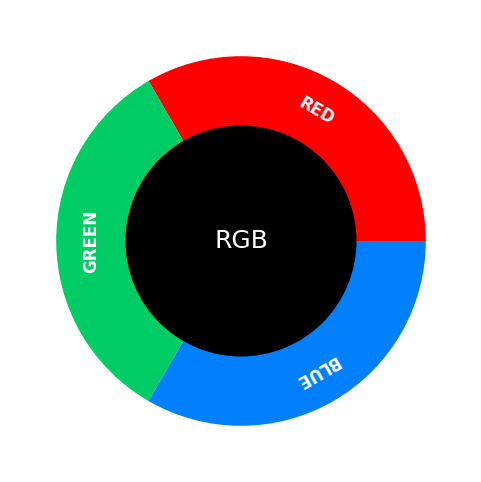

In [4]:
from matplotlib.patches import Wedge, Circle
import matplotlib.pyplot as plt
import numpy as np

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Add RGB Labels
percentage = 35
colors = ['#FF0000', '#00CC66', '#0080FF']
labels = ['RED', 'GREEN', 'BLUE']

# Plotting the ring chart
outer_radius = 0.8
inner_radius = 0.5

# Divide the circle into three equal parts (each 120 degrees)
angle_per_patch = 360 / 3

# Create the wedges for the ring with equal angles
ax.add_patch(Wedge(center=(0, 0), r=outer_radius, theta1=0, theta2=angle_per_patch, facecolor=colors[0]))
ax.add_patch(Wedge(center=(0, 0), r=outer_radius, theta1=angle_per_patch, theta2=2*angle_per_patch, facecolor=colors[1]))
ax.add_patch(Wedge(center=(0, 0), r=outer_radius, theta1=2*angle_per_patch, theta2=360, facecolor=colors[2]))

# Create the inner circle to form the ring
ax.add_patch(Circle((0, 0), radius=inner_radius, facecolor='black'))

# Add the text inside the circle
ax.text(0, 0, "RGB", ha='center', va='center', fontsize=18, color='white')

# Add circular text around each wedge
r_text = (outer_radius + inner_radius) / 2  # Radius for the circular text

for i, label in enumerate(labels):
    theta = (angle_per_patch * i + angle_per_patch / 2)  # Angle for the text
    x_text = r_text * np.cos(np.deg2rad(theta))
    y_text = r_text * np.sin(np.deg2rad(theta))

    # Add text with rotation aligned with the wedge
    ax.text(x_text, y_text, label, ha='center', va='center', rotation=theta-90, rotation_mode='anchor', fontsize=12, color='white', weight='bold')

# Set aspect ratio to equal for a perfect circle
ax.set_aspect('equal')

# Set the limits to ensure the full chart is visible
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# Remove axes
ax.axis('off')

plt.show()

# Venn Diagram

In [5]:
pip install matplotlib-venn

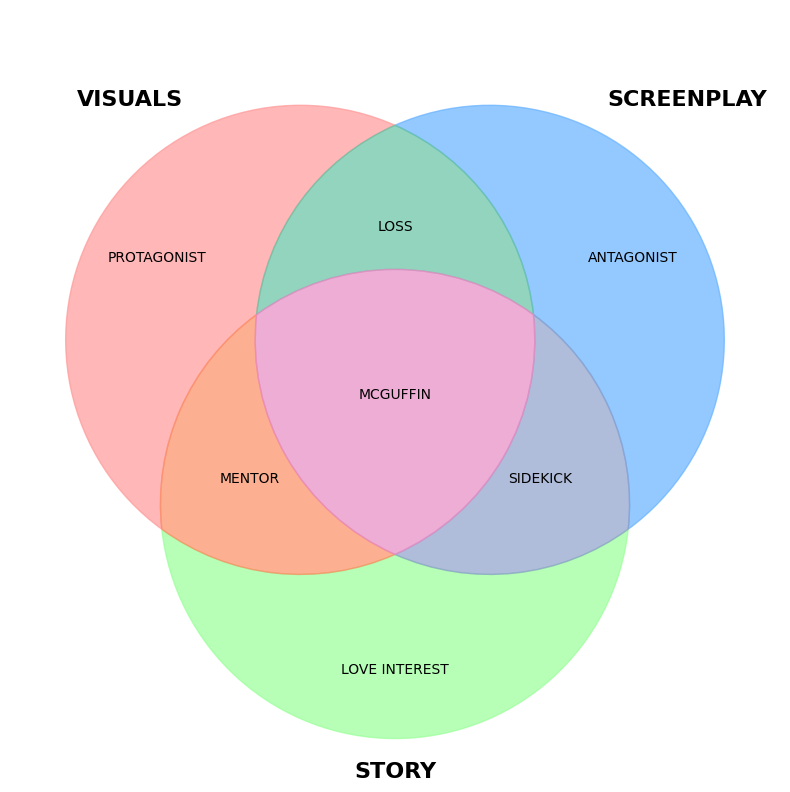

In [6]:
from matplotlib_venn import venn3

# Create a figure
fig, ax = plt.subplots(figsize=(10, 10))

# Set colors for each circle
colors = ['#FF9999', '#66B2FF', '#99FF99']

# Create the Venn diagram
venn = venn3(
    subsets=(1, 1, 1, 1, 1, 1, 1),
    set_labels=('VISUALS', 'SCREENPLAY', 'STORY')
)

# Customize colors
venn.get_patch_by_id('100').set_color(colors[0])
venn.get_patch_by_id('010').set_color(colors[1])
venn.get_patch_by_id('001').set_color(colors[2])
venn.get_patch_by_id('110').set_color('#66C2A5')
venn.get_patch_by_id('101').set_color('#FC8D62')
venn.get_patch_by_id('011').set_color('#8DA0CB')
venn.get_patch_by_id('111').set_color('#E78AC3')

# Set transparency
for patch in venn.patches:
    patch.set_alpha(0.7)

# Add custom labels to the overlaps
venn.get_label_by_id('100').set_text('PROTAGONIST')
venn.get_label_by_id('010').set_text('ANTAGONIST')
venn.get_label_by_id('001').set_text('LOVE INTEREST')
venn.get_label_by_id('110').set_text('LOSS')
venn.get_label_by_id('101').set_text('MENTOR')
venn.get_label_by_id('011').set_text('SIDEKICK')
venn.get_label_by_id('111').set_text('MCGUFFIN')

# Customize the main text labels
for label in venn.set_labels:
    label.set_fontsize(16)
    label.set_fontweight('bold')

# Set axis limits and hide axes
ax.set_xlim(-0.7, 0.7)
ax.set_ylim(-0.7, 0.7)
ax.axis('off')

# Display the plot
plt.show()